# Constructing a simple sensitivity analysis

# Preliminaries
## Importing packages

In [1]:
import numpy as np

%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
import datetime
print(datetime.datetime.now())

2019-04-26 17:01:49.869633


# Define Landscape

In [3]:
#Problem domain
x_min = -2.5
x_max = 2.5
y_min = -2.5
y_max = 2.5

domain = (x_min, x_max, y_min, y_max)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

#Testing the minimum
f(-1,-1)

0.0

# Running the Evolutionary Algorithm
2 Experiments -> Each with a 100 runs -> Each with different maximum step for mutation
## Setting the EA's parameters

In [4]:
#starting seed
np.random.seed(654321)

## Setting data storage

In [5]:
mult_res_cols = ['exp'] + ['mut_s'] + ['run', 'generation', 'fitness_min', 'fitness_max', 'fitness_mean', 'fitness_std']
multi_res = pd.DataFrame(columns=mult_res_cols)

## Parameters common to all experiments

In [6]:
#Algorithm parameters
## Number of runs, and generations per run
run_n = 50
gen_f = 40

## Population size
pop_s = 21

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 7

## Progeny subpopulation's and size
prog_s = 7
### Crossover Method
crossover = 'None'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = 0.15

## New population selection method
population_new='Ranking'

### First experiment
Maximum mutation step = 0.5

In [7]:
#Algorithm parameters
##Experiment number
exp_n = 1
## Progeny subpopulation's and size
### Mutation method, probability and size
mut_s = 0.5

In [8]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

In [9]:
query = (fitness_res['generation']==gen_f)
a = fitness_res[query]
a.insert(0,'mut_s',mut_s)
a.insert(0,'exp',exp_n)
multi_res = multi_res.append(a, ignore_index=True)

### Second experiment
Maximum mutation step = 0.75

In [10]:
exp_n += 1
mut_s = 0.75

In [ ]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

In [12]:
query = (fitness_res['generation']==gen_f)
a = fitness_res[query]
a.insert(0,'mut_s',mut_s)
a.insert(0,'exp',exp_n)
multi_res = multi_res.append(a, ignore_index=True)

### Third experiment
Maximum mutation step = 0.25

In [13]:
exp_n += 1
mut_s = 0.25

In [14]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

In [15]:
query = (fitness_res['generation']==gen_f)
a = fitness_res[query]
a.insert(0,'mut_s',mut_s)
a.insert(0,'exp',exp_n)
multi_res = multi_res.append(a, ignore_index=True)

### Fourth experiment
Maximum mutation step = 0.15

In [16]:
exp_n += 1
mut_s = 0.15

In [17]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

In [18]:
query = (fitness_res['generation']==gen_f)
a = fitness_res[query]
a.insert(0,'mut_s',mut_s)
a.insert(0,'exp',exp_n)
multi_res = multi_res.append(a, ignore_index=True)

### Fifth experiment
Maximum mutation step = 0.05

In [19]:
exp_n += 1
mut_s = 0.05

In [20]:
genera_res, fitness_res = EA_exp(run_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

In [21]:
query = (fitness_res['generation']==gen_f)
a = fitness_res[query]
a.insert(0,'mut_s',mut_s)
a.insert(0,'exp',exp_n)
multi_res = multi_res.append(a, ignore_index=True)

In [22]:
multi_res.head()

,exp,mut_s,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
0,1,0.5,0,40,0.472505,0.619480,0.612481,0.032073
1,1,0.5,1,40,0.472989,1.592684,1.016668,0.405302
2,1,0.5,2,40,0.777372,0.777372,0.777372,0.000000
3,1,0.5,3,40,0.827534,1.006069,0.836036,0.038959
4,1,0.5,4,40,0.957118,0.957118,0.957118,0.000000


(0, 1.3672806496558025)

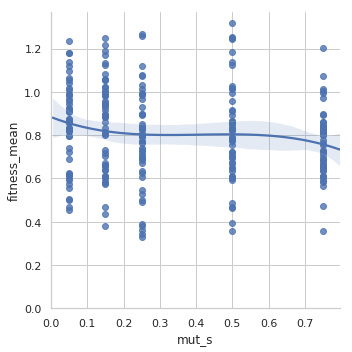

In [23]:
sns.lmplot(x='mut_s', y='fitness_mean', fit_reg=True, order=3, data=multi_res)
plt.xlim(0,None)
plt.ylim(0,None)

In [24]:
print(datetime.datetime.now())

2019-04-26 17:10:32.511248
